# 바나나 분류 프로젝트

1. 라이브러리 가져오기
2. 필요한 함수 정의하기 - averagecolor() , evaluateaccuracy()
3. 데이터 준비하기 
   수집한 이미지가 저장된 폴더를 하나씩 읽어 학습 데이터셋 구축하기
    
4. 모델 생성하고 학습하기 - sklearn 사용하기
5. 모델 평가하고 예측하기

# 방법1 
- 데이터 전체 읽어 X, y 구성 후 train_test_split() 사용하여 학습용/테스트용 데이터 준비
- KNN 모델 사용

## 1. 라이브러리 가져오기

In [3]:
import cv2
import os
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

## 2. 특성 및 평가 함수 만들기

In [4]:
# 특성을 추출하는 함수 정의(평균 색상)
# def averagecolor(image):
#     return np.mean(image, axis=(0, 1))

def averagecolor(image):
    if image is not None:  # 이미지가 None이 아닐 때만 평균 색상을 계산합니다.
        return np.mean(image, axis=(0, 1))
    else:
        return None  # 이미지가 None일 경우 None을 반환합니다.

# def evaluateaccuracy(filenames, predictedY):
#     predictedY = np.array(predictedY)
#     if (np.sum(realtestY!=predictedY)>0):
#         print ("Wrong Predictions: (filename, labelled, predicted) ")
#         print (np.dstack([filenames,realtestY,predictedY]).squeeze()[(realtestY!=predictedY)])
#     # 전체 예측의 백분율로 일치하는 (정확한) 예측을 계산합니다.
#     return "Correct :"+ str(np.sum(realtestY==predictedY)) + ". Wrong: "+str(np.sum(realtestY!=predictedY)) + ". Correctly Classified: " + str(np.sum(realtestY==predictedY)*100/len(predictedY))+"%"

## 3. 데이터 준비하기

In [9]:
# 필요한 라이브러리 임포트
import cv2  # 이미지 처리를 위한 OpenCV 라이브러리
import os   # 파일 및 디렉토리 작업을 위한 모듈
import numpy as np  # 배열 연산을 위한 NumPy 라이브러리

# 1. 데이터 저장을 위한 빈 리스트 초기화
X = []  # 이미지의 특징값들을 저장할 리스트
y = []  # 각 이미지의 라벨 인덱스를 저장할 리스트

# 2. 데이터 폴더 경로와 라벨(클래스) 정의
path = "data/"  # 이미지가 저장된 메인 폴더 경로
labels = ['unripe', 'ripe', 'overripe']  # 분류할 과일의 상태 라벨들 (덜 익음, 익음, 과숙)

# 3. 각 라벨별로 반복하면서 이미지 데이터 수집
for label in labels:
   # 3-1. 현재 처리 중인 라벨 출력 (진행 상황 확인용)
   print("Loading training images for the label: " + label)
   
   # 3-2. 해당 라벨 폴더 내의 모든 파일 목록 가져오기
   for filename in os.listdir(path + label + "/"):
       
       # 3-3. 각 이미지 파일 읽기
       img = cv2.imread(path + label + "/" + filename)
       
       # 3-4. 이미지에서 특징 추출 (예: 평균 색상값)
       img_features = averagecolor(img)  # averagecolor 함수로 이미지의 평균 색상 계산
       
       # 3-5. 특징값을 X 리스트에 추가
       X.append(img_features)
       
       # 3-6. 현재 라벨의 인덱스를 y 리스트에 추가
       # labels.index(label)은 현재 라벨이 labels 리스트에서 몇 번째인지 찾음
       # 예: 'unripe'는 0, 'ripe'는 1, 'overripe'는 2
       y.append(labels.index(label))
       
# 결과 배열로 변환
X = np.array(X)
y = np.array(y)

# 4. 결과 확인 (데이터 로딩 완료)
# 여기서 X는 모든 이미지의 특징값들이 담긴 리스트
# y는 각 이미지의 클래스 라벨(0, 1, 2) 정보가 담긴 리스트
print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"첫 번째 샘플의 특징값: {X[0]}")
print(f"첫 번째 샘플의 라벨: {y[0]}")

Loading training images for the label: unripe
Loading training images for the label: ripe
Loading training images for the label: overripe

X shape: (150, 3)
y shape: (150,)
첫 번째 샘플의 특징값: [172.57667065 205.27905941 214.60592365]
첫 번째 샘플의 라벨: 0


In [16]:
# 방법2
import cv2
import os
import numpy as np
from pathlib import Path

def load_image_data(data_path="data/", labels=None):
    """
    이미지 데이터와 라벨을 로드하는 함수
    
    :param data_path: 데이터 폴더 경로
    :param labels: 라벨 리스트 (기본값: ['unripe', 'ripe', 'overripe'])
    :return: X (특징 데이터), y (라벨 인덱스)
    """
    if labels is None:
        labels = ['unripe', 'ripe', 'overripe']
    
    X = []
    y = []
    
    # 데이터 경로가 존재하는지 확인
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"데이터 경로를 찾을 수 없습니다: {data_path}")
    
    # 각 라벨별로 이미지 로드
    for label_idx, label in enumerate(labels):
        label_path = os.path.join(data_path, label)
        
        # 라벨 폴더가 존재하는지 확인
        if not os.path.exists(label_path):
            print(f"경고: {label} 폴더를 찾을 수 없습니다.")
            continue
        
        print(f"\n{label} 라벨의 이미지를 불러오는 중...")
        
        # 폴더 내 이미지 파일 찾기
        image_files = [f for f in os.listdir(label_path) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        
        if not image_files:
            print(f"경고: {label} 폴더에 이미지가 없습니다.")
            continue
        
        total_files = len(image_files)
        print(f"  총 {total_files}개의 이미지를 처리합니다...")
        
        for idx, filename in enumerate(image_files):
            try:             
                img_path = os.path.join(label_path, filename)
                img = cv2.imread(img_path)
                
                # 이미지 읽기 실패 처리
                if img is None:
                    print(f"경고: {filename}을 읽을 수 없습니다.")
                    continue
                
                # 이미지 특징 추출
                img_features = average_color(img)
                
                # 특징이 추출되지 않은 경우 처리
                if img_features is None:
                    print(f"경고: {filename}에서 특징을 추출할 수 없습니다.")
                    continue
                
                X.append(np.array(img_features))
                y.append(label_idx)
                
            except Exception as e:
                print(f"오류: {filename} 처리 중 문제 발생: {e}")
    
    # 결과 배열로 변환
    X = np.array(X)
    y = np.array(y)
    
    # 결과 요약 출력
    print(f"\n데이터 로딩 완료:")
    print(f"총 샘플 수: {len(X)}")
    for label_idx, label in enumerate(labels):
        count = np.sum(y == label_idx)
        print(f"  {label}: {count}개")
    
    return X, y

def average_color(image):
    """
    이미지의 평균 색상을 계산하는 함수
    
    :param image: OpenCV로 읽은 이미지 (BGR 형식)
    :return: 평균 색상값 [B, G, R]
    """
    if image is None or image.size == 0:
        return None
    
    # 이미지의 평균 색상 계산
    avg_color = np.mean(image, axis=(0, 1))
    return avg_color.tolist()

# 사용 예제
if __name__ == "__main__":
    # 데이터 로드
    X, y = load_image_data()
    
    # 결과 확인
    print(f"\nX shape: {X.shape}")
    print(f"y shape: {y.shape}")
    print(f"첫 번째 샘플의 특징값: {X[0]}")
    print(f"첫 번째 샘플의 라벨: {y[0]}")


unripe 라벨의 이미지를 불러오는 중...
  총 50개의 이미지를 처리합니다...

ripe 라벨의 이미지를 불러오는 중...
  총 50개의 이미지를 처리합니다...

overripe 라벨의 이미지를 불러오는 중...
  총 50개의 이미지를 처리합니다...

데이터 로딩 완료:
총 샘플 수: 150
  unripe: 50개
  ripe: 50개
  overripe: 50개

X shape: (150, 3)
y shape: (150,)
첫 번째 샘플의 특징값: [172.57667065 205.27905941 214.60592365]
첫 번째 샘플의 라벨: 0


## 3.모델 생성 및 학습하기

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# 3. 모델 평가하기
print("테스트 정확도:{:.3f}".format(model_knn.score(X_test, y_test)))

테스트 정확도:0.500


In [19]:
# 4. 모델 예측하기
y_pred = model_knn.predict(X_test)

df_result = pd.DataFrame(columns=['Actual', 'Predicted'])
df_result['Actual'] = y_test
df_result['Predicted'] = y_pred
df_result.head()

,Actual,Predicted
0,1,1
1,0,2
2,2,0
3,1,1
4,1,1


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.46      0.67      0.55         9
           2       0.50      0.27      0.35        11

    accuracy                           0.50        30
   macro avg       0.50      0.51      0.49        30
weighted avg       0.50      0.50      0.48        30



In [22]:
# 모델 예측하기 - 테스트 폴더 레이블 구성하여 진행하기
import warnings
warnings.filterwarnings(action='ignore') 
from sklearn.metrics import classification_report

def averagecolor(image):
    if image is None:
        return None
    else:
        return np.mean(image, axis=(0, 1))

# 이미지 하위 디렉토리 3개 폴더에 있는 훈련 이미지를 반복합니다.
path = "./data/test/"
labels = ['unripe','ripe' , 'overripe']
X_test = []
y_test = []

# 각 레이블의 디렉토리를 반복하여 이미지를 로드하고 특징을 추출합니다.
for label in labels:
    print("Loading test images for the label:", label)
    class_folder = os.path.join(path, label)
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)
        image = cv2.imread(image_path)

        if image is not None:  # 이미지가 제대로 로드되었는지 확인합니다.
            img_features = averagecolor(image)
            if img_features is not None:  # 이미지 특징이 제대로 계산되었는지 확인합니다.
                X_test.append(img_features)                
                y_test.append(labels.index(label))
                #y_test.append(label)

# 이미지 특징과 레이블을 NumPy 배열로 변환합니다.
X_test = np.array(X_test, dtype=np.float32)  # float32로 형변환을 해줘야 할 수 있습니다.
y_test = np.array(y_test)

# 모델 예측
y_pred = model_knn.predict(X_test)

# 정확도 평가(sklearn 패키지는 유용한 보고서를 제공합니다)
print()
print(classification_report(y_test, y_pred))

print("테스트 정확도:{:.3f}".format(model_knn.score(X_test, y_test)))

Loading test images for the label: unripe


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './data/test/unripe'

# 방법2
- train / test 데이터를 별도로 구성하여 각각 학습용/테스트용 데이터 준비
- KNN 모델 사용

In [10]:
# train dataset 생성하기
import cv2
import os
X_train2 = []
y_train2 = []

# 이미지 하위 디렉토리 3개 폴더에 있는 훈련 이미지를 반복합니다.
path = "data/"
labels = ['unripe', 'ripe', 'overripe']
for label in labels:
    print ("Loading training images for the label: "+label)
    
    # 하위 폴더의 모든 이미지를 읽어옵니다.
    for filename in os.listdir(path+label+"/"): 
        img = cv2.imread(path+label+"/"+filename)
        img_features = averagecolor(img)
        X_train2.append(np.array(img_features))
        y_train2.append(label)

Loading training images for the label: unripe
Loading training images for the label: ripe
Loading training images for the label: overripe


In [11]:
# test dataset 생성하기
import cv2
import os
X_test2 = []
y_test2 = []

# 이미지 하위 디렉토리 3개 폴더에 있는 훈련 이미지를 반복합니다.
path = "data/test/"
labels = ['unripe', 'ripe', 'overripe']
for label in labels:
    print ("Loading training images for the label: "+label)
    
    # 하위 폴더의 모든 이미지를 읽어옵니다.
    for filename in os.listdir(path+label+"/"): 
        img = cv2.imread(path+label+"/"+filename)
        img_features = averagecolor(img)
        X_test2.append(np.array(img_features))
        y_test2.append(label)

Loading training images for the label: unripe
Loading training images for the label: ripe
Loading training images for the label: overripe


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train2, y_train2)

KNeighborsClassifier()

In [13]:
# 3. 모델 평가하고 예측하기 - 정확도, 
print("테스트 정확도:{:.3f}".format(model_knn.score(X_test2, y_test2)))

테스트 정확도:0.778


In [14]:
y_pred2 = model_knn.predict(X_test2)
df_result2 = pd.DataFrame(columns=['Actual', 'Predicted'])
df_result2['Actual'] = y_test2
df_result2['Predicted'] = y_pred2
df_result2.head()

,Actual,Predicted
0,unripe,unripe
1,unripe,unripe
2,unripe,unripe
3,unripe,ripe
4,unripe,unripe


In [21]:
y_pred2

array(['unripe', 'unripe', 'unripe', 'ripe', 'unripe', 'unripe', 'unripe',
       'unripe', 'unripe', 'unripe', 'unripe', 'unripe', 'ripe',
       'overripe', 'ripe', 'overripe', 'overripe', 'ripe', 'ripe', 'ripe',
       'ripe', 'ripe', 'overripe', 'overripe', 'overripe', 'unripe',
       'overripe'], dtype='<U8')

In [15]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

    overripe       0.57      0.80      0.67         5
        ripe       0.88      0.64      0.74        11
      unripe       0.83      0.91      0.87        11

    accuracy                           0.78        27
   macro avg       0.76      0.78      0.76        27
weighted avg       0.80      0.78      0.78        27



In [16]:
from sklearn.preprocessing import LabelEncoder  # 레이블을 숫자로 인코딩

encoder = LabelEncoder()                         
encodedtrainY2 = encoder.fit_transform(y_train2) 
encodedtestY2 = encoder.transform(y_test2) 

from sklearn import svm
#model = svm.SVC(gamma="scale", decision_function_shape='ovr')
model_svm = svm.SVC(gamma=0.001, decision_function_shape='ovr')
model_svm.fit(X_train2, encodedtrainY2)

SVC(gamma=0.001)

In [17]:
# 3. 모델 평가하고 예측하기 - 정확도, 
print("테스트 정확도:{:.3f}".format(model_svm.score(X_test2, encodedtestY2)))

테스트 정확도:0.741


In [26]:
y_pred3 = model_svm.predict(X_test2)

# 예측을 코드화합니다.
prediction = encoder.inverse_transform(y_pred3)

In [25]:
print(classification_report(y_test2, prediction))

              precision    recall  f1-score   support

    overripe       0.50      0.40      0.44         5
        ripe       0.78      0.64      0.70        11
      unripe       0.79      1.00      0.88        11

    accuracy                           0.74        27
   macro avg       0.69      0.68      0.67        27
weighted avg       0.73      0.74      0.73        27



# 방법3 
- 데이터 전체 읽어 X, y 구성 후 train_test_split() 사용하여 학습용/테스트용 데이터 준비
- 신경망 - CNN 모델 사용

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt


path = "data/"
labels = ['unripe', 'ripe', 'overripe']
X = []
y = []

for label in labels:
    print("Loading training images for the label:", label)
    class_folder = os.path.join(path, label)
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)
        img = cv2.imread(image_path)
        if img is not None:
            img = cv2.resize(img, (48, 48))  # 모든 이미지를 48x48 크기로 조정
            X.append(img)
            y.append(labels.index(label))
        else:
            print(f"Image load failed: {image_path}")

# 배열 변환 전에 모든 이미지가 NumPy 배열인지 확인
print("All images are NumPy arrays:", all(isinstance(x, np.ndarray) for x in X))

# 데이터를 NumPy 배열로 변환
image_data = np.array(X, dtype=object)  # dtype을 object로 설정하여 비정형 배열 문제 회피

# 올바른 형태의 배열인지 확인
if image_data.ndim == 4 and image_data.shape[3] == 3:  # (샘플 수, 높이, 너비, 채널)
    image_data = image_data.astype('float32') / 255
    # 레이블 One-Hot 인코딩
    class_labels = to_categorical(y, num_classes=len(labels))
else:
    print("Image data shape is incorrect:", image_data.shape)
    
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(image_data, class_labels, test_size=0.2, random_state=10)

# 모델 구성 및 컴파일 (이전과 동일)
num_classes=len(labels)
num_detectors = 32
width, height = 48, 48

model = Sequential()
...  # ... Conv2D 레이어 추가



# 모델 컴파일하기기
...  # 모델 컴파일하기기

# 모델 학습
epochs = 50
...  # 모델 학습하기기

Loading training images for the label: unripe
Loading training images for the label: ripe
Loading training images for the label: overripe
All images are NumPy arrays: True
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.6372 - loss: 1.0817
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.8744 - loss: 0.3396
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.8907 - loss: 0.2814
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.9530 - loss: 0.1543
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.9747 - loss: 0.1309
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.9498 - loss: 0.1107
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.9026 - loss: 0.2095
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.9876 - loss: 0.0815
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.9712 - loss: 0.1024
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.9553 - 

In [16]:
# 모델 평가
eval_result = model.evaluate(X_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(*eval_result))

# 테스트 데이터 예측 및 시각화
preds = model.predict(X_test)
preds_classes = np.argmax(preds, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4569 - loss: 1.9572 
Test Loss: 1.9187374114990234, Test Accuracy: 0.46666666865348816
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step


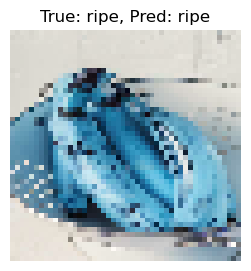

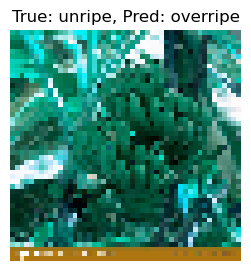

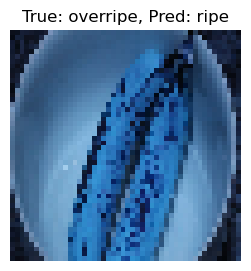

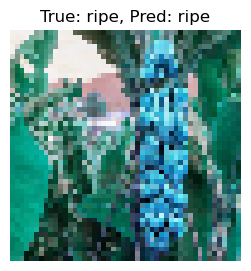

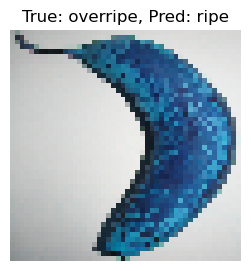

In [17]:
# 시각화할 이미지 개수
num_images = 5
samples_to_display = np.random.choice(X_test.shape[0], num_images, replace=False)

# 테스트 데이터 중 일부 이미지 시각화
# 레이블 리스트를 class_labels로 변경하였으므로, 아래 부분을 수정합니다.
for i, idx in enumerate(samples_to_display):
    img = X_test[idx]  # 차원 축소 필요 없음
    true_label_index = y_test_classes[idx]
    pred_label_index = preds_classes[idx]
    
    plt.figure(figsize=(5, 3))
    plt.imshow(img)  # 컬러 이미지로 변경, cmap='gray' 삭제
    plt.title(f"True: {labels[true_label_index]}, Pred: {labels[pred_label_index]}")
    plt.axis('off')
    plt.show()